In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
import pandas as pd

# Correct dataset path
data_path = r"Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
import os

print(os.path.exists(data_path))

True


In [11]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

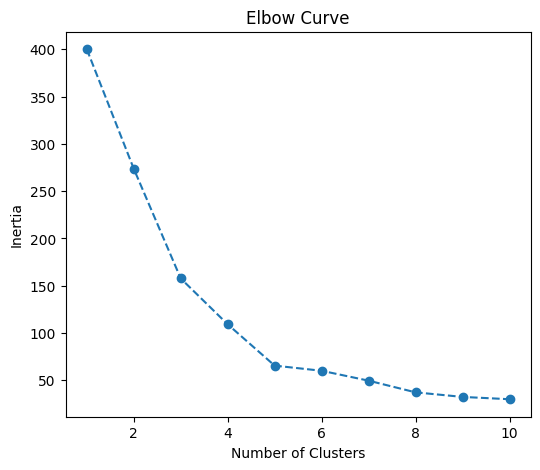

In [18]:
# Plotting the Elbow Curve
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [22]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=6, random_state=42)

In [23]:
df['Cluster'] = kmeans.labels_

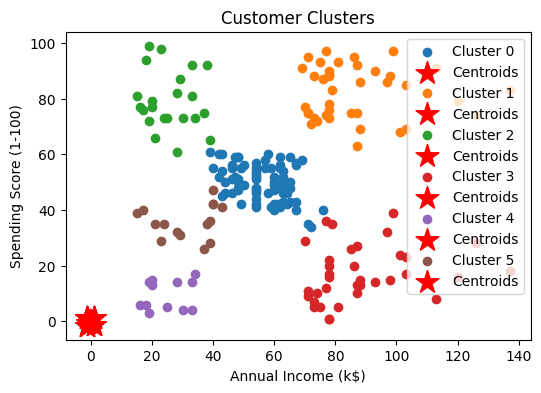

In [26]:
plt.figure(figsize=(6, 4))
for cluster in range(n_clusters):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Annual Income (k$)'],
                clustered_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()